# Import libraries and data
1.   numpy for the logarithm function
2.   pandas_datareader for the crypto data
3.   matplotlib for plotting graphs



In [136]:
import numpy as np
from pandas_datareader import data as wb
import matplotlib.pyplot as plt

# Set Number of Days in a Year
###### Crypto is traded 24/7

In [151]:
# https://en.wikipedia.org/wiki/Year#:~:text=In%20the%20Julian%20calendar%2C%20the,year%20there%20are%20366%20days.
DAYS_IN_YEAR = 365.25
#DAYS_IN_YEAR = 221

# Define Functions


*   ` get_ticker_symbol():` gets the ticker symbol
*   `get_start_date(): ` gets the start date. If none is specified then MAX
*   `get_simple_ror(data_frame):` calculates simple ror
*   `get_average_returns_daily(data_frame):`calculates average daily return
*  ` def get_average_returns_annually(data_frame):`calculates average returns annually
*   `def get_log_ror(data_frame):`calculates logarithmic rate of return
*   `def get_log_returns_daily(data_frame):`calculates average daily log return
*   `def get_log_returns_annually(data_frame):`alculates average log returns annually



In [152]:
def get_ticker_symbol():
  return input("Enter Ticker Symbol: ")

def get_start_date():
  return input("Enter Start date from when you want to get data. Example: 2014-09-16 or enter for from the beginning of time: ")

# Get's data for specified Crypto or Security - Use Yahoo Finanace website as 
# reference.
def get_data(ticker):  
  data = wb.DataReader(ticker, data_source='yahoo', start=start_date)
  return data

def get_simple_ror(data_frame):
  data_frame['simple_return'] = (data_frame['Adj Close'] / data_frame['Adj Close'].shift(1)) - 1
  return data_frame['simple_return']

def get_average_returns_daily(data_frame):
  average_returns_daily = data_frame['simple_return'].mean()
  return average_returns_daily

def get_average_returns_annually(data_frame):
  average_returns_annually = data_frame['simple_return'].mean() * DAYS_IN_YEAR
  return average_returns_annually

def get_log_ror(data_frame):
  data_frame['log_return'] = np.log(data_frame['Adj Close'] / data_frame['Adj Close'].shift(1))
  return data_frame['log_return']

def get_log_returns_daily(data_frame):
  log_returns_daily = data_frame['log_return'].mean()
  return log_returns_daily

def get_log_returns_annually(data_frame):
  log_returns_annually = data_frame['log_return'].mean() * DAYS_IN_YEAR
  return log_returns_annually

# Run Program

In [164]:
# Get ticker symbol and start date. Press enter for max date.
# Run program - asks for user input
ticker = get_ticker_symbol()
start_date = get_start_date()
print()

Enter Ticker Symbol: BNB-USD
Enter Start date from when you want to get data. Example: 2014-09-16 or enter for from the beginning of time: 



In [165]:
# call to get_data for ticker data frame.
symbol_dataframe = get_data(ticker)
print('[' +ticker+']' + ' ' + 'Start Date ' + start_date)
print(symbol_dataframe)

[BNB-USD] Start Date 
                  High         Low  ...        Volume   Adj Close
Date                                ...                          
2017-07-24    0.115841    0.101531  ...  1.452690e+05    0.105870
2017-07-25    0.109013    0.099266  ...  2.003950e+05    0.105138
2017-07-26    0.108479    0.100888  ...  3.444990e+05    0.107737
2017-07-27    0.109019    0.101473  ...  3.425680e+05    0.104067
2017-07-28    0.111264    0.101108  ...  3.402180e+05    0.107811
...                ...         ...  ...           ...         ...
2021-04-27  578.888123  539.072510  ...  3.648785e+09  562.632568
2021-04-28  614.824158  554.284668  ...  6.585919e+09  599.706543
2021-04-29  627.777466  586.205811  ...  5.741358e+09  624.080566
2021-04-30  641.860840  611.302002  ...  4.065705e+09  619.347229
2021-05-03  630.458252  621.919922  ...  3.842887e+09  630.458252

[1374 rows x 6 columns]


In [166]:
# Analyze the dataset
print(symbol_dataframe.describe())

              High          Low  ...        Volume    Adj Close
count  1374.000000  1374.000000  ...  1.374000e+03  1374.000000
mean     37.238234    33.736274  ...  4.895472e+08    35.775075
std      88.816617    79.076151  ...  1.327006e+09    84.828003
min       0.101211     0.096109  ...  9.284000e+03     0.099867
25%      10.209650     9.579805  ...  4.720298e+07     9.823200
50%      16.159481    15.261992  ...  1.863375e+08    15.733907
75%      25.357121    23.083067  ...  3.471818e+08    24.433601
max     641.860840   621.919922  ...  1.798295e+10   630.458252

[8 rows x 6 columns]


In [167]:
print(get_simple_ror(symbol_dataframe))

Date
2017-07-24         NaN
2017-07-25   -0.006914
2017-07-26    0.024720
2017-07-27   -0.034064
2017-07-28    0.035977
                ...   
2021-04-27   -0.010270
2021-04-28    0.065894
2021-04-29    0.040643
2021-04-30   -0.007584
2021-05-03    0.017940
Name: simple_return, Length: 1374, dtype: float64


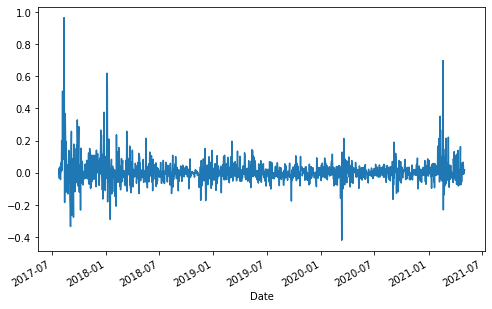

In [168]:
#plot simple return
sror = get_simple_ror(symbol_dataframe)
sror.plot(figsize=(8,5))

In [169]:
average_returns_daily = get_average_returns_daily(symbol_dataframe)
average_returns_daily
print("The average daily simple rate of return for " + ticker + " is " 
      + str(round(average_returns_daily, 5) * 100) + ' %')

The average daily simple rate of return for BNB-USD is 0.9209999999999999 %


In [170]:
average_returns_annually = get_average_returns_annually(symbol_dataframe)
average_returns_annually
print("The average annual simple rate of return for " + ticker + " is " 
      + str(round(average_returns_annually, 5) * 100) + ' %')

The average annual simple rate of return for BNB-USD is 336.267 %


In [171]:
print(get_log_ror(symbol_dataframe))

Date
2017-07-24         NaN
2017-07-25   -0.006938
2017-07-26    0.024419
2017-07-27   -0.034658
2017-07-28    0.035345
                ...   
2021-04-27   -0.010323
2021-04-28    0.063814
2021-04-29    0.039839
2021-04-30   -0.007613
2021-05-03    0.017781
Name: log_return, Length: 1374, dtype: float64


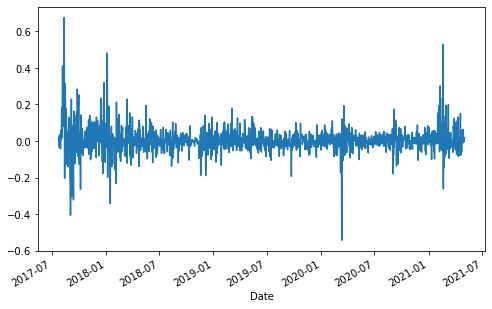

In [172]:
#plot simple return
lror = get_log_ror(symbol_dataframe)
lror.plot(figsize=(8,5))

In [173]:
average_log_returns_daily = get_log_returns_daily(symbol_dataframe)
average_log_returns_daily
print("The average daily logarithmic rate of return for " + ticker + " is " 
      + str(round(average_log_returns_daily, 5) * 100) + ' %')

The average daily logarithmic rate of return for BNB-USD is 0.633 %


In [174]:
average_log_returns_annually = get_log_returns_annually(symbol_dataframe)
average_log_returns_annually
print("The average annual logarithmic rate of return for " + ticker + " is " 
      + str(round(average_log_returns_annually, 5) * 100) + ' %')

The average annual log rate of return for BNB-USD is 231.22699999999998 %
